<a href="https://colab.research.google.com/github/thedatadj/machine-learning/blob/main/DecisionTreeClassifier_Pre_Pruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary
I train several decision tree models and modify one of these tree hyperparameter in each model:
* `max_depth`
* `min_samples_split`
* `min_samples_leaf`
And compare the results.

## Conclusion
In this specific dataset, the best performing model was the one where I used `min_samples_leaf = 4`

# Pre-prunning in the `two_moons` dataset

In [1]:
# Load the data
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

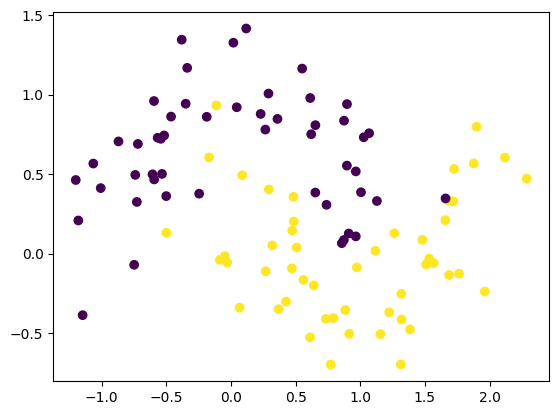

In [2]:
# Visualize data
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)

# Data split

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

# Evaluation function

In [7]:
def evaluate(model, X, y):
    y_pred = model.predict(X)
    correct = 0
    total = len(y_pred)
    for i in range(total):
        if y_pred[i] == y[i]:
            correct += 1
    return correct/total

# Model without prunning

In [9]:
from sklearn.tree import DecisionTreeClassifier

modelnp = DecisionTreeClassifier()

# Training
modelnp.fit(X_train, y_train)

# Evaluation
train_accuracy_np = evaluate(modelnp, X_train, y_train)
valid_accuracy_np = evaluate(modelnp, X_valid, y_valid)

print("Training accuracy in No-Prunning Model:  ", train_accuracy_np)
print("Validation accuracy in No-Prunning Model:", valid_accuracy_np)

Training accuracy in No-Prunning Model:   1.0
Validation accuracy in No-Prunning Model: 0.76


# Model with prunning

## max_depth

In [20]:
model_p1 = DecisionTreeClassifier(max_depth=3)

# Training
model_p1.fit(X_train, y_train)

# Evaluation
train_accuracy_p1 = evaluate(model_p1, X_train, y_train)
valid_accuracy_p1 = evaluate(model_p1, X_valid, y_valid)
print("Training accuracy in No-Prunning Model:  ", train_accuracy_p1)
print("Validation accuracy in No-Prunning Model:", valid_accuracy_p1)

Training accuracy in No-Prunning Model:   0.9066666666666666
Validation accuracy in No-Prunning Model: 0.8


After trying values from 1 to 6 the best value for `max_depth` was 3.

## `min_samples_split`

In [45]:
model_p2 = DecisionTreeClassifier(min_samples_split=21)

# Training
model_p2.fit(X_train, y_train)

# Evaluate
train_accuracy_p2 = evaluate(model_p2, X_train, y_train)
valid_accuracy_p2 = evaluate(model_p2, X_valid, y_valid)
print("Training accuracy in No-Prunning Model:  ", train_accuracy_p2)
print("Validation accuracy in No-Prunning Model:", valid_accuracy_p2)

Training accuracy in No-Prunning Model:   0.9066666666666666
Validation accuracy in No-Prunning Model: 0.8


## `min_samples_leaf`

In [60]:
model_p3 = DecisionTreeClassifier(min_samples_leaf=4)

# Training
model_p3.fit(X_train, y_train)

# Evaluate
train_accuracy_p3 = evaluate(model_p3, X_train, y_train)
valid_accuracy_p3 = evaluate(model_p3, X_valid, y_valid)
print("Training accuracy in No-Prunning Model:  ", train_accuracy_p3)
print("Validation accuracy in No-Prunning Model:", valid_accuracy_p3)

Training accuracy in No-Prunning Model:   0.9333333333333333
Validation accuracy in No-Prunning Model: 0.92
